In [1]:
import solution_crosser
import solution_generator
import table_placer
import CONST
from graph import RoomGraph
import loader
import matplotlib.pyplot as plt
import numpy as np


In [17]:
def graph_to_heatmap(graph:RoomGraph):
    shape = (max(graph.walls, key=lambda x: x[0])[0] + 1, max(graph.walls, key=lambda x: x[1])[1] + 1)
    heatmap = [[0 for _ in range(shape[1])] for _ in range(shape[0])]
    for wall in graph.walls:
        heatmap[wall[0]][wall[1]] = 1
    for door in graph.doors:
        heatmap[door[0]][door[1]] = 2
    for table in graph.tables:
        heatmap[table[0]][table[1]] = 3
    for chair in graph.chairs:
        heatmap[chair[0]][chair[1]] = 4
    
    return heatmap

graph = loader.load_grid("grids_solutions/grid_test")
print(graph.tables)
heatmap = graph_to_heatmap(graph)


    

{(7, 17), (10, 43), (2, 39), (16, 38), (7, 35), (5, 10), (5, 28), (3, 49), (13, 17), (16, 13), (7, 10), (17, 51), (11, 44), (5, 3), (10, 54), (2, 50), (12, 18), (5, 21), (4, 23), (3, 33), (4, 32), (6, 4), (10, 29), (9, 3), (14, 17), (11, 9), (5, 23), (8, 25), (17, 46), (9, 42), (11, 2), (3, 28), (4, 27), (14, 37), (12, 49), (8, 36), (7, 16), (10, 42), (9, 44), (5, 9), (11, 4), (4, 29), (10, 8), (13, 16), (15, 13), (16, 12), (7, 9), (17, 50), (10, 44), (11, 43), (2, 40), (6, 22), (2, 49), (12, 17), (4, 22), (16, 51), (16, 5), (13, 18), (9, 30), (11, 36), (5, 4), (9, 2), (14, 16), (15, 36), (10, 3), (15, 54), (4, 33), (11, 11), (10, 21), (10, 30), (17, 45), (6, 8), (15, 38), (3, 18), (14, 18), (16, 37), (16, 46), (8, 17), (5, 27), (8, 26), (8, 35), (6, 10), (9, 43), (7, 36), (10, 53), (4, 28), (3, 32), (5, 29), (6, 3), (3, 50), (11, 42), (6, 21), (12, 16), (4, 21), (16, 50), (10, 9), (11, 8), (5, 22), (16, 4), (9, 29), (11, 35), (6, 23), (10, 2), (9, 4), (10, 11), (3, 27), (14, 36), (15,

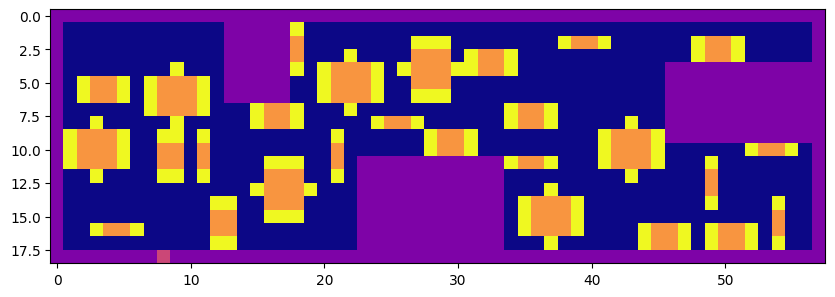

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(heatmap, cmap="plasma", interpolation='nearest')

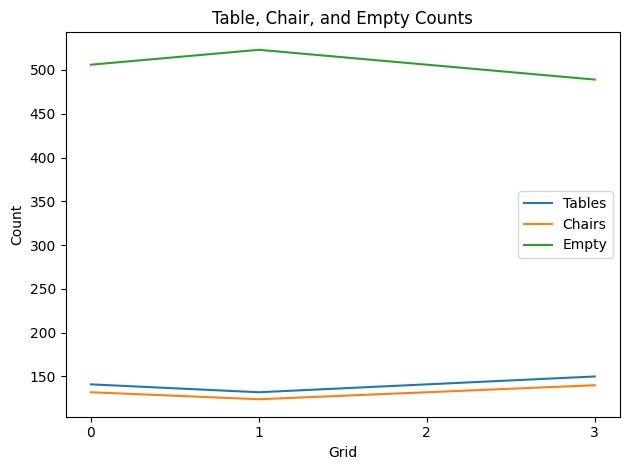

In [30]:
#file_list: list of file names
def graph_stats(file_list):
    graph_list = []
    for file in file_list:
        graph_list.append(loader.load_grid(file))
    table_count = []
    chair_count = []
    empty_count = []
    for graph in graph_list:
        area = (max(graph.walls, key=lambda x: x[0])[0] + 1)*(max(graph.walls, key=lambda x: x[1])[1] + 1)
        table_count.append(len(graph.tables))
        chair_count.append(len(graph.chairs))
        empty_count.append(area - len(graph.tables) - len(graph.chairs) - len(graph.walls) - len(graph.doors))
    fig, ax = plt.subplots()
    index = np.arange(len(file_list))
    ax.plot(index, table_count, label='Tables')
    ax.plot(index, chair_count, label='Chairs')
    ax.plot(index, empty_count, label='Empty')
    plt.xlabel('Grid')
    plt.ylabel('Count')
    plt.title('Table, Chair, and Empty Counts')
    plt.xticks(index)
    plt.legend()
    plt.tight_layout()
    plt.show()

#example usage
f_list = ["grids_solutions/sol_grid0", "grids_solutions/sol_grid1", "grids_solutions/sol_grid2", "grids_solutions/sol_grid3"]
graph_stats(f_list)



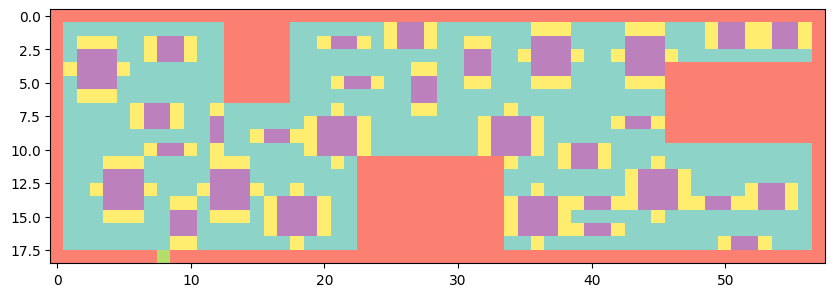

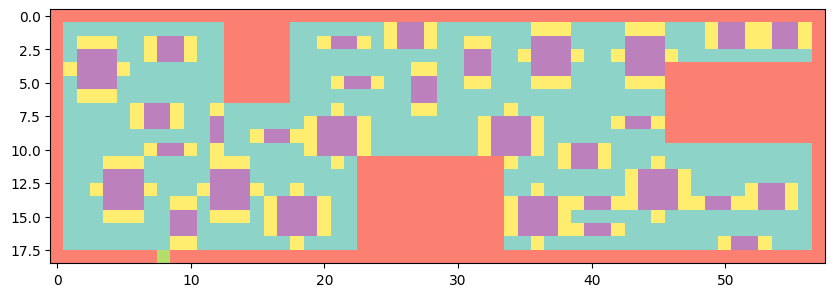

In [47]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
def animate_evolution(file_list):
    plt.ion()
    graph_list = []
    for file in file_list:
        graph_list.append(loader.load_grid(file))
    heatmap_list = []
    for graph in graph_list:
        heatmap_list.append(graph_to_heatmap(graph))
    fig, ax = plt.subplots(figsize=(10, 10))
    for heatmap in heatmap_list:
        ax.imshow(heatmap, cmap="Set3", interpolation='nearest')
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1.0)



f_list = ["grids_solutions/sol_grid0", "grids_solutions/sol_grid1", "grids_solutions/sol_grid2", "grids_solutions/sol_grid3"]
animate_evolution(f_list)